In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
df=pd.DataFrame(data=load_boston().data, columns=load_boston().feature_names)
df['prise']=load_boston().target

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,prise
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


visualization

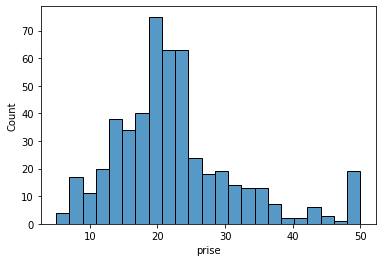

In [ ]:
sns.histplot(x=df['prise'])

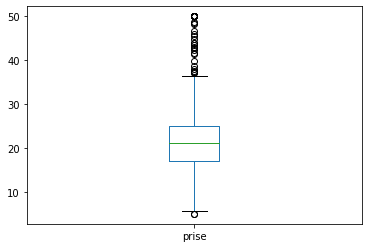

In [ ]:
df.prise.plot.box()

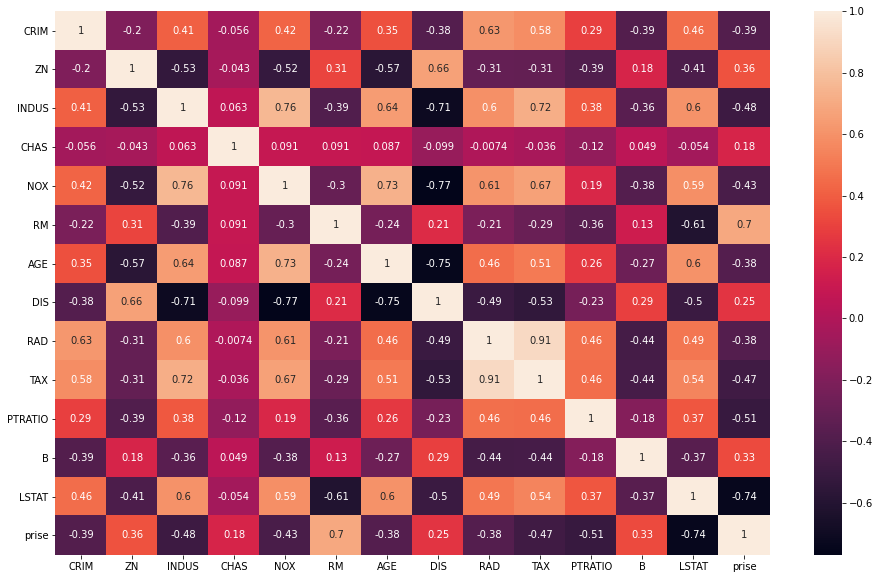

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

training

In [ ]:
X=df.drop(['prise'],axis=1)
y=df['prise']

xtr,xtst,ytr,ytst=train_test_split(X,y,test_size=0.3)

In [ ]:
model=LinearRegression()
model.fit(xtr,ytr)

print('train r-squared: ',model.score(xtr,ytr))
print('test r-squared: ',model.score(xtst,ytst))

print('intersepr: ',model.intercept_)

pd.DataFrame(data=model.coef_,index=xtr.columns,columns=['coef'])

train r-squared:  0.7450127772578302
test r-squared:  0.7221996778491938
intersepr:  34.50889384349409


,coef
CRIM,-0.112134
ZN,0.038970
INDUS,0.032611
CHAS,2.758534
NOX,-17.862699
RM,4.221362
AGE,-0.004320
DIS,-1.409364
RAD,0.279648
TAX,-0.011912


transform

In [ ]:
df.prise.skew()

1.1080984082549072

In [ ]:
y_log=np.log(df.prise)


In [ ]:
y_log.skew()

-0.33032129530987864

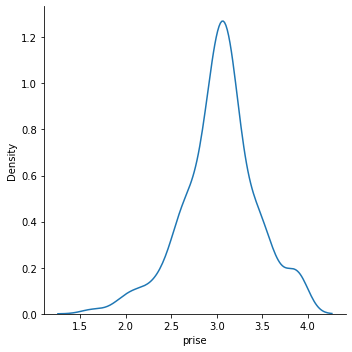

In [ ]:
sns.displot(y_log,kind="kde")

In [ ]:
X=df.drop(['prise'],axis=1)
y=np.log(df['prise'])

xtr,xtst,ytr,ytst=train_test_split(X,y,test_size=0.3)

model2=LinearRegression()
model2.fit(xtr,ytr)

print('train r-squared: ',model2.score(xtr,ytr))
print('test r-squared: ',model2.score(xtst,ytst))

print('intersepr: ',model2.intercept_)

pd.DataFrame(data=model2.coef_,index=xtr.columns,columns=['coef'])

train r-squared:  0.7947967582611375
test r-squared:  0.7711901170069697
intersepr:  4.227608639320446


,coef
CRIM,-0.009645
ZN,0.001089
INDUS,0.002193
CHAS,0.094012
NOX,-0.918733
RM,0.095853
AGE,0.000213
DIS,-0.053718
RAD,0.014471
TAX,-0.000617


filtering

In [ ]:
x_incl_const=sm.add_constant(xtr)

model3=sm.OLS(ytr,x_incl_const)
res=model3.fit()

pd.DataFrame({'coef':res.params,'p-val':round(res.pvalues,3)})

,coef,p-val
const,4.227609,0.000
CRIM,-0.009645,0.000
ZN,0.001089,0.086
INDUS,0.002193,0.478
CHAS,0.094012,0.016
NOX,-0.918733,0.000
RM,0.095853,0.000
AGE,0.000213,0.735
DIS,-0.053718,0.000
RAD,0.014471,0.000


In [ ]:
vif=[variance_inflation_factor(exog=x_incl_const.values,exog_idx=i) for i in range(x_incl_const.shape[1])]
pd.DataFrame({'coef':res.params,'vif':np.round(vif,2)})

,coef,vif
const,4.227609,596.69
CRIM,-0.009645,1.77
ZN,0.001089,2.31
INDUS,0.002193,4.25
CHAS,0.094012,1.10
NOX,-0.918733,4.58
RM,0.095853,2.00
AGE,0.000213,3.06
DIS,-0.053718,3.91
RAD,0.014471,8.40


In [ ]:
x_incl_const=sm.add_constant(xtr)

model3=sm.OLS(ytr,x_incl_const)
res=model3.fit()

org=pd.DataFrame({'coef':res.params,'p-val':round(res.pvalues,3)})
print('BIC: ',res.bic)
print('r-squared: ',res.rsquared)

BIC:  -101.46788677679987
r-squared:  0.7947967582611375


In [ ]:
x_incl_const=sm.add_constant(xtr)
x_incl_const=x_incl_const.drop(['INDUS'],axis=1)
model3=sm.OLS(ytr,x_incl_const)
res=model3.fit()

minus_indus=pd.DataFrame({'coef':res.params,'p-val':round(res.pvalues,3)})
print('BIC: ',res.bic)
print('r-squared: ',res.rsquared)

BIC:  -106.81177781349695
r-squared:  0.7944919700181031


In [ ]:
x_incl_const=sm.add_constant(xtr)
x_incl_const=x_incl_const.drop(['INDUS','AGE','TAX'],axis=1)
model3=sm.OLS(ytr,x_incl_const)
res=model3.fit()

minus_indus_AGE=pd.DataFrame({'coef':res.params,'p-val':round(res.pvalues,3)})
print('BIC: ',res.bic)
print('r-squared: ',res.rsquared)

NameError: ignored

In [ ]:
FRAME=[org,minus_indus_AGE]
pd.concat(FRAME,axis=1)

,coef,p-val,coef,p-val
const,4.227609,0.000,4.202886,0.000
CRIM,-0.009645,0.000,-0.009687,0.000
ZN,0.001089,0.086,0.001039,0.097
INDUS,0.002193,0.478,NaN,NaN
CHAS,0.094012,0.016,0.098430,0.010
NOX,-0.918733,0.000,-0.865812,0.000
RM,0.095853,0.000,0.096239,0.000
AGE,0.000213,0.735,NaN,NaN
DIS,-0.053718,0.000,-0.056321,0.000
RAD,0.014471,0.000,0.013813,0.000


intervals


In [ ]:
log_mse=round(res.mse_resid,3)

NameError: ignored